# Working with US data

#### import the data 🧾

#### clean the data 🛠

#### show distribution and relations 📈

#### some EDA analysis 📊

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
sns.set_style("white")

In [2]:
df=pd.read_csv("../input/youtube-new/USvideos.csv")

In [3]:
df.head() 

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

## clean data
- remove columns i don'nt need
- searching for null values and treat them
- change the dtype to the one that can be treated with
- add the category name to the data

#### 1- remove columns with no need

In [4]:
drop_cols=["description","thumbnail_link","tags","video_id"]
df=df.drop(columns=drop_cols,axis=1)

In [5]:
df.head(3) 

trending_date                                              title  \
0      17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1      17.14.11  The Trump Presidency: Last Week Tonight with J...   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   

     channel_title  category_id              publish_time    views   likes  \
0     CaseyNeistat           22  2017-11-13T17:13:01.000Z   748374   57527   
1  LastWeekTonight           24  2017-11-13T07:30:00.000Z  2418783   97185   
2     Rudy Mancuso           23  2017-11-12T19:05:24.000Z  3191434  146033   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   
2      5339           8181              False             False   

   video_error_or_removed  
0                   False  
1                   False  
2                   False

#### 2- searching for null values and treat them

In [6]:
df.isna().sum() 

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

- so there is no null values, awesome 😀

#### 3- change the dtype to the one that can be treated with

In [7]:
# correc the type of tranding_date
df["trending_date"]=pd.to_datetime(df["trending_date"],format="%y.%d.%m")
# correct the type of published_time
df["publish_time"]=pd.to_datetime(df["publish_time"])

In [8]:
df.dtypes 

trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
dtype: object

#### 4- add the category name to the data for understanding the category_id

In [9]:
# make a dictionary of category id and name
cat={
    1:"Film & Animation",
    2:"Autos & Vehicles",
    10:"Music",
    15:"Pets & Animals",
    17:"Sports",
    18:"Short Movies",
    19:"Travel & Events",
    20:"Gaming",
    21:"Videoblogging",
    22:"People & Blogs",
    23:"Comedy",
    24:"Entertainment",
    25:"News & Politics",
    26:"Howto & Style",
    27:"Education",
    28:"Science & Technology",
    29:"Nonprofits & Activism",
    30:	"Movies",
    31:	"Anime/Animation",
    32:	"Action/Adventure",
    33: "Classics",
    34:"Comedy",
    35:	"Documentary",
    36:"Drama",
    37:"Family",
    38:"Foreign",
    39:"Horror",
    40:"Sci-Fi/Fantasy",
    41:"Thriller",
    42:"Shorts",
    43:"Shows",
    44: "Trailers"
    
}

- making a function that return the name of the category_id

In [10]:
df["category"]=df["category_id"].apply(lambda x: cat[x]) 

In [11]:
df["category"].value_counts(dropna=False)

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category, dtype: int64

##### it worked just fine.🥳

# nuemeric values analysis and show distribution

#### 1-show distribution

In [12]:
px.box(df,x="views")

In [13]:
px.box(df,x="likes")

In [14]:
px.box(df,x="dislikes")

In [15]:
px.box(df,x="comment_count")

- trying to show the relation between likes and views

Text(336.9714285714286, 0.5, 'likes')

<Figure size 432x288 with 0 Axes>

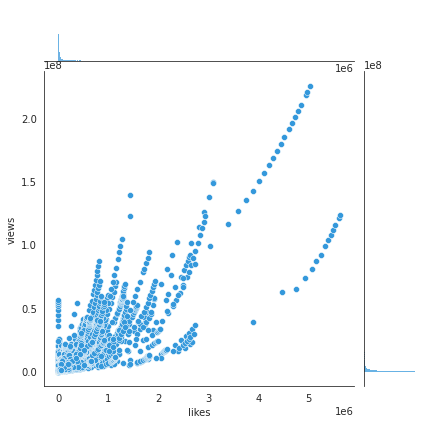

In [16]:

plt.figure()
sns.jointplot(data=df,x="likes",y="views",color="#3498DB")
plt.xlabel("likes",fontsize=20)
plt.ylabel("likes",fontsize=20)

- show all the relations

<Figure size 1080x1080 with 0 Axes>

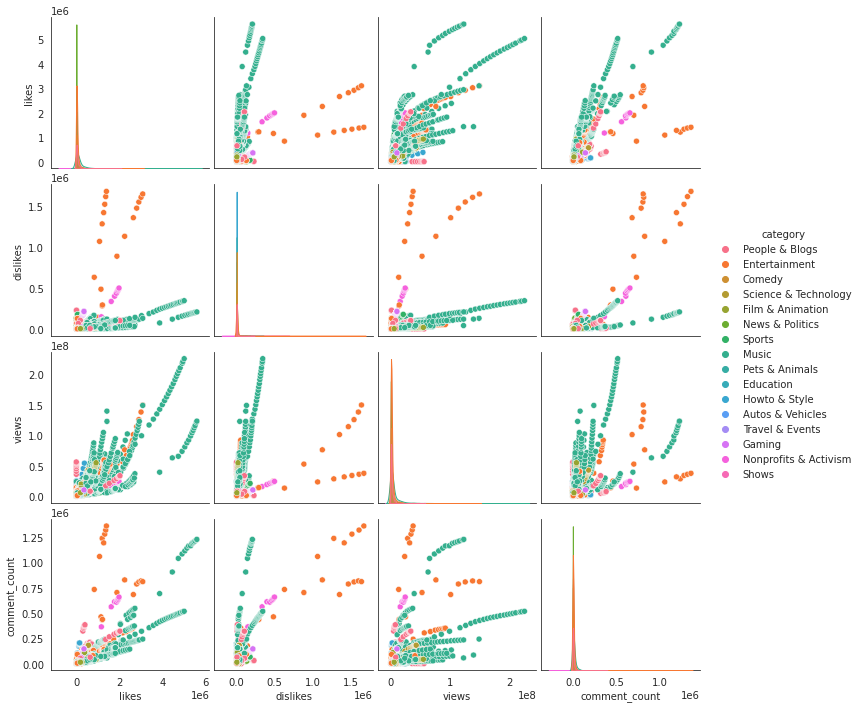

In [17]:
cols=["likes","dislikes","views","comment_count","category"]
plt.figure(figsize=(15,15))
sns.pairplot(df[cols],diag_kind="kde",hue="category",palette="husl")

<AxesSubplot:>

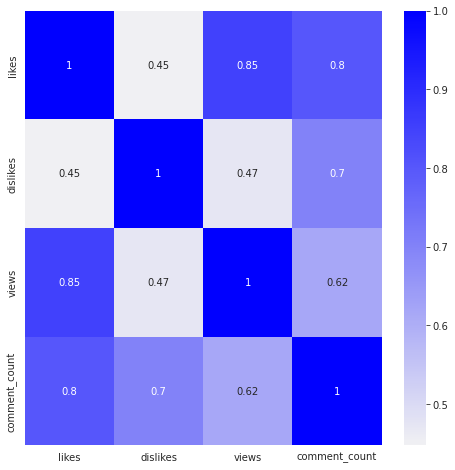

In [18]:
plt.figure(figsize=(8,8))
pallete=sns.light_palette(color="blue",as_cmap=True)
sns.heatmap(df[cols].corr(),annot=True,cmap=pallete)

#### what that till us:
- <span style="color:red;backgorund-color:#bbb"> views & likes </span> have nearly strong <span style="color:red"> positive relationship </span>
-<span style="color:green;backgorund-color:#bbb"> comments_Count & likes </span> have nearly strong <span style="color:green"> positive relationship </span>
-<span style="color:blue;backgorund-color:#bbb"> Comments_Count & dislikes </span> have nearly strong <span style="color:blue"> positive relationship </span>


#### lets see if the category affect the relation

In [19]:
px.scatter(data_frame=df,x="likes",y="views",color="category",trendline="ols",trendline_scope="overall")

# start the asking questions and answer them

### 1- what is the category that dominate the trend videos

In [20]:
cats=df["category"].value_counts()
fig=px.pie(names=cats.index,values=cats.values,title="Categories and number of thier trend videos",
      labels={"names":"Category ","values":"Num of videos"},
    color_discrete_sequence=px.colors.sequential.Plotly3
      )
fig.update_layout(
#title
    title_font_size=20,title_x=.5,title_font_color="#fff",
    paper_bgcolor="#283747",legend_bgcolor="#5D6D7E",legend_font_color="#fff", legend_title_text="Category",
    legend_title_font_size=15,legend_title_font_color="#154360",font_color="#fff"
)

### for each category, is there a channel that dominate the filed? 

In [21]:
channels=df.groupby("category")["channel_title"].value_counts(normalize=True).sort_values(ascending=False)
channels

category               channel_title           
Shows                  Bleacher Report             0.719298
                       CNET                        0.280702
Nonprofits & Activism  Bill Gates                  0.263158
Travel & Events        Strictly Dumpling           0.166667
Nonprofits & Activism  Logan Paul Vlogs            0.140351
                                                     ...   
Entertainment          Guinness World Records      0.000100
                       dannotv                     0.000100
                       Famous Celebrities Snaps    0.000100
                       David Seymour               0.000100
                       Freeform                    0.000100
Name: channel_title, Length: 2360, dtype: float64

In [22]:
len(channels.loc["Entertainment"])

478

In [23]:
x=pd.Series( [channels.loc[i][0] for i in df["category"].unique()],index=[ channels.loc[i].index[0] for i in df["category"].unique()])

In [24]:
X=pd.DataFrame()
X["category"]=df["category"].unique()
X["dominator_channel"]=[channels.loc[i].index[0] for i in df["category"].unique()]
X["percentage"]=[ channels.loc[i][0]  for i in df["category"].unique()]
X["percentage"]=(X["percentage"]*100).round(2)
X["per_str"]=" %" + X["percentage"].astype(str) 

In [25]:
X

category                       dominator_channel  percentage  \
0          People & Blogs                           BuzzFeedVideo        5.23   
1           Entertainment                                 Netflix        1.94   
2                  Comedy  The Tonight Show Starring Jimmy Fallon        5.70   
3    Science & Technology                        Marques Brownlee        5.41   
4        Film & Animation                          Screen Junkies        7.76   
5         News & Politics                                     Vox        7.76   
6                  Sports                                    ESPN        9.34   
7                   Music                             PTXofficial        1.39   
8          Pets & Animals                        Brave Wilderness       11.52   
9               Education                                  TED-Ed        9.78   
10          Howto & Style                          First We Feast        3.69   
11       Autos & Vehicles                             Doug DeMuro       12.50   
12        Travel & Events                       Strictly Dumpling       16.67   
13                 Gaming                                Nintendo       10.65   
14  Nonprofits & Activism                              Bill Gates       26.32   
15                  Shows                         Bleacher Report       71.93   

    per_str  
0     %5.23  
1     %1.94  
2      %5.7  
3     %5.41  
4     %7.76  
5     %7.76  
6     %9.34  
7     %1.39  
8    %11.52  
9     %9.78  
10    %3.69  
11    %12.5  
12   %16.67  
13   %10.65  
14   %26.32  
15   %71.93

In [26]:
fig=px.bar(X,x="dominator_channel",y="percentage",color="category",
       title="The top channels in each category has number of trend videos",
       text="per_str",
       labels={"dominator_channel":"Channel","percentage":"Percent of it's videos"},
       hover_data={"per_str":False},
#            color_discrete_sequence=px.colors.sequential.Plotly3
      )
fig.update_layout(
#title
    title_font_size=20,title_x=.5,title_font_color="#fff",
    paper_bgcolor="#283747",legend_bgcolor="#5D6D7E",legend_font_color="#fff", legend_title_text="Category",
    legend_title_font_size=15,legend_title_font_color="#154360",font_color="#fff",plot_bgcolor="#34495E",height=600,)
fig.update_traces(textposition='outside',textfont_color="#FDFEFE  ",textfont_size=15)

fig.show()

### what is the category that has the highest interacation ?

- defining interacation may be number of comments per number of views

In [27]:
df["interaction"]=round((df["comment_count"]/ df["views"])*100,2) 

In [28]:
interaction=(df.groupby("category")["interaction"].mean().sort_values(ascending=False)*100).round(1).to_frame()
interaction["per_str"]=interaction["interaction"].astype(str) +" %"

In [29]:
fig=px.bar(interaction,x=interaction.index , y=interaction["interaction"],
       title="Categories with percent of Comments 'comments per views'",
       text="per_str" ,
       labels={"x":"Category ","y":"Percent of comments"},
       hover_data={"per_str":False},
           color_discrete_sequence=["#1B4F72"]
        
      )
fig.update_layout(
#title
    title_font_size=20,title_x=.5,title_font_color="#fff",font_color="#fff",plot_bgcolor="#34495E",height=600,paper_bgcolor="#283747",
    
)
fig.update_traces(textposition='inside',textfont_color="#fff",textfont_size=15)

fig.show()

#### if you have any question to answer..... i wil try it.
#### thanks